In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1st Try

In [2]:
# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2:].values
y2 = dataset.iloc[:, 2].values
dataset  ### 10 rows no need for a train test split

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [9]:
y


array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

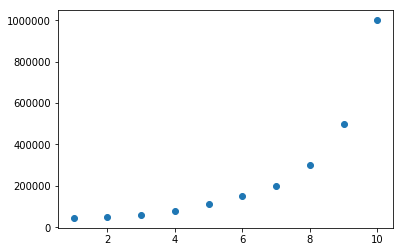

In [142]:
plt.scatter(x=dataset['Level'], y=dataset['Salary'])

#### it's not a linear problem, so the kernel shouldn't be linear !!!

In [143]:
# Fitting the SVR Model to the dataset
from sklearn.svm import SVR

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [144]:
regressor = SVR(kernel = 'rbf')  ## gaussian kernel
regressor.fit(X, y)

C:\Users\EL MAHDI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [145]:
# Predicting a new result
y_pred = regressor.predict(6.5)
y_pred

array([130001.55760156])

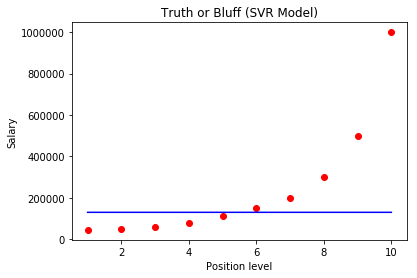

"\n# Visualising the SVR results (for higher resolution and smoother curve)\nX_grid = np.arange(min(X), max(X), 0.1)\nX_grid = X_grid.reshape((len(X_grid), 1))\nplt.scatter(X, y, color = 'red')\nplt.plot(X_grid, regressor.predict(X_grid), color = 'blue')\nplt.title('Truth or Bluff (SVR Model)')\nplt.xlabel('Position level')\nplt.ylabel('Salary')\nplt.show()"

In [146]:
# Visualising the SVR results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (SVR Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

"""
# Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()"""

# 2nd Try

##  a straight line in svr is a bad sign, we need to do a feature scaling. svm class doesn't include it so we have to do it manually

In [147]:
# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2:].values ### needed instead of iloc[:, 2] to avoid scaling problems
dataset  ### 10 rows no need for a train test split

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [148]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

### Feature Scaling


In [149]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
#y= np.array(y).reshape(-1,1)  ## sc_y.fit_transform won't work if we didn't reshape y

y = sc_y.fit_transform(y)


C:\Users\EL MAHDI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [150]:
regressor2 = SVR(kernel = 'rbf')  ## gaussian kernel
regressor2.fit(X, y)
#Predicting a new result
# because the W of the training was scaled so we need to scale 6.5 transform expect an array well it work without np.array thing
y_pred2 = regressor2.predict(sc_X.transform(np.array([[6.5]])))
#y_pred  the scaled prediction of the salary 
### we need to inverse the y_pred to get the real predicted value

y_pred2 = sc_y.inverse_transform(y_pred2)

C:\Users\EL MAHDI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [151]:
y_pred2

array([170370.0204065])

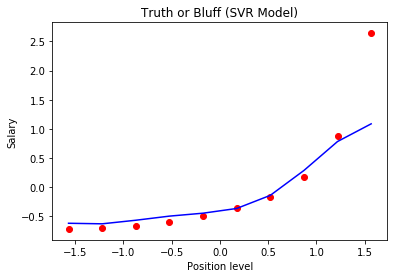

In [152]:
# Visualising the SVR results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor2.predict(X), color = 'blue')
plt.title('Truth or Bluff (SVR Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


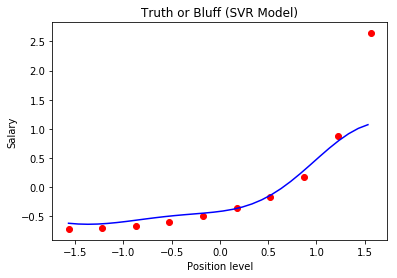

In [153]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor2.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()